### Import the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data file

In [60]:
df = pd.read_csv("train_loan_data.csv")

df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


### Let's check for the data types and missing values

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

There are numerical as well as categorical features.

There are also missing values. Let's check the fraction of missing values in each column.

In [62]:
df.isna().sum()/len(df)

addr_state              0.000000
annual_inc              0.000000
earliest_cr_line        0.000000
emp_length              0.057350
emp_title               0.062725
fico_range_high         0.000000
fico_range_low          0.000000
grade                   0.000000
home_ownership          0.000000
application_type        0.000000
initial_list_status     0.000000
int_rate                0.000000
loan_amnt               0.000000
num_actv_bc_tl          0.049350
mort_acc                0.034638
tot_cur_bal             0.049350
open_acc                0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    0.000387
purpose                 0.000000
revol_bal               0.000000
revol_util              0.000663
sub_grade               0.000000
term                    0.000000
title                   0.012125
total_acc               0.000000
verification_status     0.000000
loan_status             0.000000
dtype: float64

the fraction of missing values is only 5%. so we'll drop them.

In [63]:
df = df.dropna().reset_index(drop=True)
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [64]:
df.shape

(70375, 28)

There is a date column but is not parsed. So let's do that. We will parse the month from the given date.

In [65]:
dates = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = dates.dt.month_name()

The 'emp_length' column can be encoded numerically.

In [66]:
emp_len_enc = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

df['emp_length'] = df['emp_length'].map(emp_len_enc)

The 'term' column can be encoded numerically.

In [67]:
term_enc = {
    ' 36 months': 0,
    ' 60 months': 1
}

df['term'] = df['term'].map(term_enc)

Let's look at the categorical columns and see whether we should use one-hot encoding on them or not.

In [68]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(), '\n')

addr_state
CA    10238
TX     5824
NY     5637
FL     4835
IL     2746
NJ     2520
PA     2347
GA     2235
OH     2221
NC     2015
VA     1981
MI     1808
AZ     1722
MA     1659
CO     1616
MD     1613
WA     1533
MN     1291
IN     1230
MO     1120
TN     1101
NV     1043
CT     1000
WI      929
OR      916
SC      862
AL      859
LA      810
KY      745
OK      644
KS      573
UT      494
AR      494
NM      385
HI      361
MS      333
NH      331
RI      309
WV      234
NE      221
MT      207
DE      190
AK      189
DC      180
WY      171
SD      170
VT      162
ME       99
ID       93
ND       79
Name: count, dtype: int64 

earliest_cr_line
September    7125
October      6787
August       6758
November     6069
March        5754
July         5745
December     5555
June         5496
May          5468
April        5420
February     5214
January      4984
Name: count, dtype: int64 

emp_title
Teacher                        1259
Manager                        1176
Owner             

We will see what do with the 'addr_state', 'earliest_cr_line', 'grade', 'subgrade', and 'verification_status' columns in the EDA section below.

The 'emp_title' column has over 33000 different entries and many values occur only once or a few times. One-hot encoding this will blow-up the dataset whereas label-encoding will cause issues after the train-test split.

One way to approach this problem is to group similar job titles together into, for example, industry or sector. But that is time-consuming for now. So for now we will drop this column.

The 'home_ownership' column has three values which occurs relatively rarely. We will group them into a single category called 'OTHERS'.

Then we will encode them numericaly by alloting 3 to OWN houses 2 to RENT houses, 1 to MORTGAGE houses, and 0 to OTHERS.

In [69]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHERS' if x in ['ANY', 'NONE', 'OTHER'] else x)

term_enc = {
    'OWN': 3,
    'RENT': 2,
    'MORTGAGE':1,
    'OTHERS':0
}

df['home_ownership'] = df['home_ownership'].map(term_enc)

The 'purpose' column has multiple values which occurs relatively rarely. We will group them into a single category called 'OTHERS'.

In [70]:
df['purpose'] = df['purpose'].apply(lambda x: x if x in ['debt_consolidation', 'credit_card', 'home_improvement'] else 'OTHERS')

The 'title' column is similar to the 'purpose' column with the difference being the former has more descriptive and custom values leading to a total of more than 3000 distinct values. So we will drop this column.

Finally, we will encode our target column.

In [71]:
target_enc = {
    'Paid':0,
    'Defaulted':1
}

df['loan_status'] = df['loan_status'].map(target_enc)

### Let's check the decriptive statistics of our original numerical features.

In [72]:
df.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,loan_status
count,7.037500e+04,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000,70375.00000,7.037500e+04,70375.000000,70375.000000,70375.000000,7.037500e+04,70375.000000,70375.000000,70375.000000,70375.000000
mean,7.812718e+04,6.005144,699.144398,695.144227,1.601748,13.257706,14689.951332,3.647417,1.67227,1.446263e+05,11.790409,0.217819,0.136782,1.662945e+04,52.177229,0.245940,25.272455,0.196774
std,7.162171e+04,3.684321,31.154326,31.153503,0.668538,4.796940,8755.183715,2.261829,2.00080,1.607175e+05,5.534244,0.584177,0.383931,2.323391e+04,24.298831,0.430646,12.066326,0.397563
min,0.000000e+00,0.000000,664.000000,660.000000,0.000000,5.310000,1000.000000,0.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000
25%,4.800000e+04,3.000000,674.000000,670.000000,1.000000,9.750000,8000.000000,2.000000,0.00000,3.102950e+04,8.000000,0.000000,0.000000,6.134000e+03,34.000000,0.000000,16.000000,0.000000
50%,6.503300e+04,6.000000,694.000000,690.000000,1.000000,12.740000,12500.000000,3.000000,1.00000,8.508200e+04,11.000000,0.000000,0.000000,1.131200e+04,52.600000,0.000000,24.000000,0.000000
75%,9.242500e+04,10.000000,714.000000,710.000000,2.000000,16.020000,20000.000000,5.000000,3.00000,2.152635e+05,15.000000,0.000000,0.000000,1.994300e+04,70.900000,0.000000,32.000000,0.000000
max,7.141778e+06,10.000000,850.000000,845.000000,3.000000,30.990000,40000.000000,32.000000,31.00000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,1.000000,162.000000,1.000000


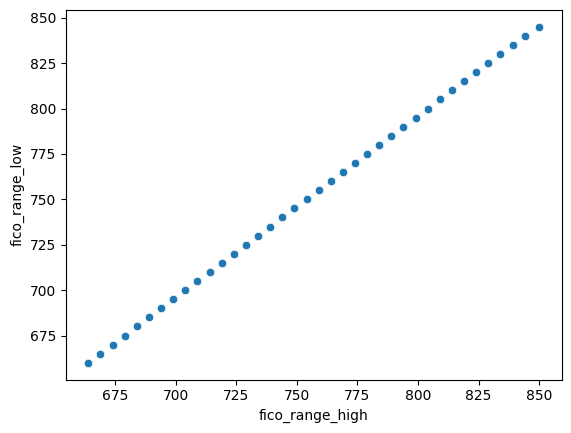

In [73]:
sns.scatterplot(data=df, x='fico_range_high', y='fico_range_low')
plt.show()

'fico_range_low' and 'fico_range_high' have similar stats and are linearly related. So we'll drop any one of these.

We will see what to do about the remaining original numerical columns.

Most people's revealed income is less than roughly half-a-million.

### Exploratory Data Analysis

#### Distribution of income

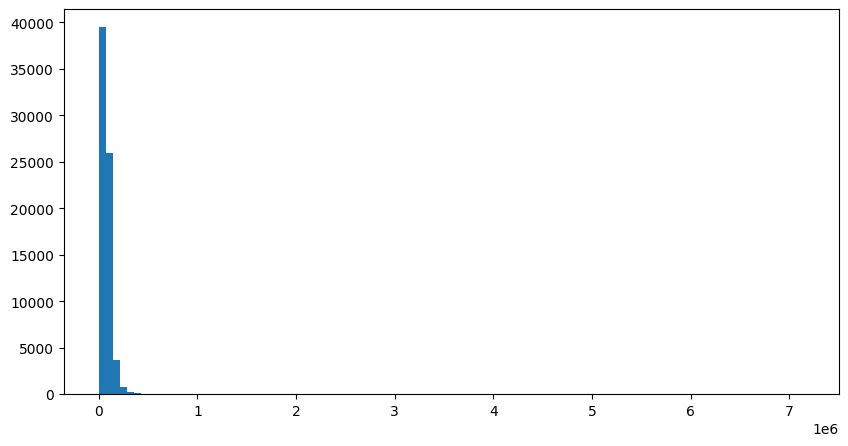

In [74]:
plt.figure(figsize=(10,5))
plt.hist(df['annual_inc'], bins=100)
plt.show()

#### Percentages of derogatory public records

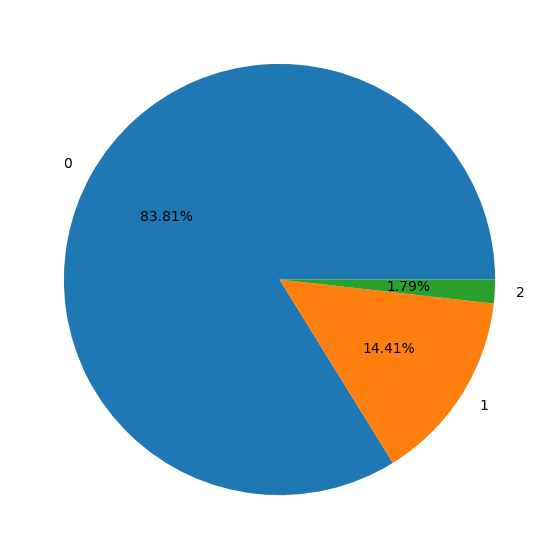

In [75]:
plt.figure(figsize=(10,7))
plt.pie(x=df['pub_rec'].value_counts().values[:3],
        labels=df['pub_rec'].value_counts().index[:3],
        autopct='%2.2f%%')
plt.show()

Most people in this dataset don't have much derogatory public records.

#### The remaining categorical columns

<Axes: xlabel='earliest_cr_line'>

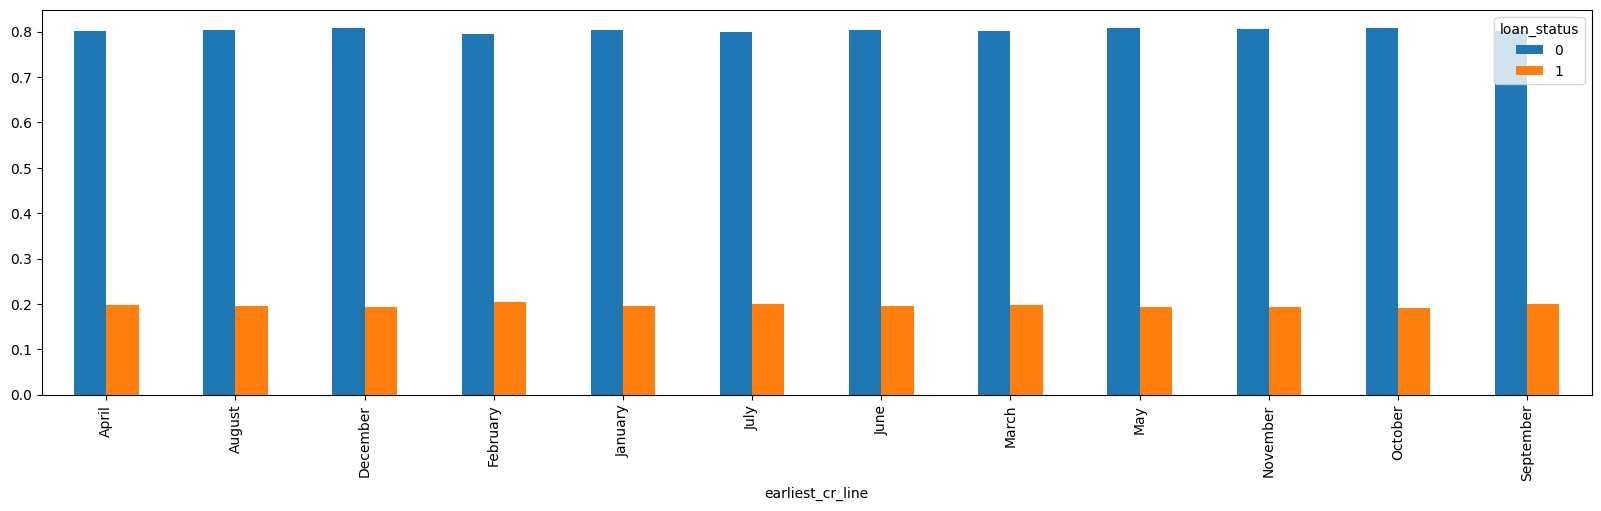

In [76]:
df.groupby('earliest_cr_line')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

It doesn't seem like the 'loan_status' is dependent on the month. So we'll drop the month column.

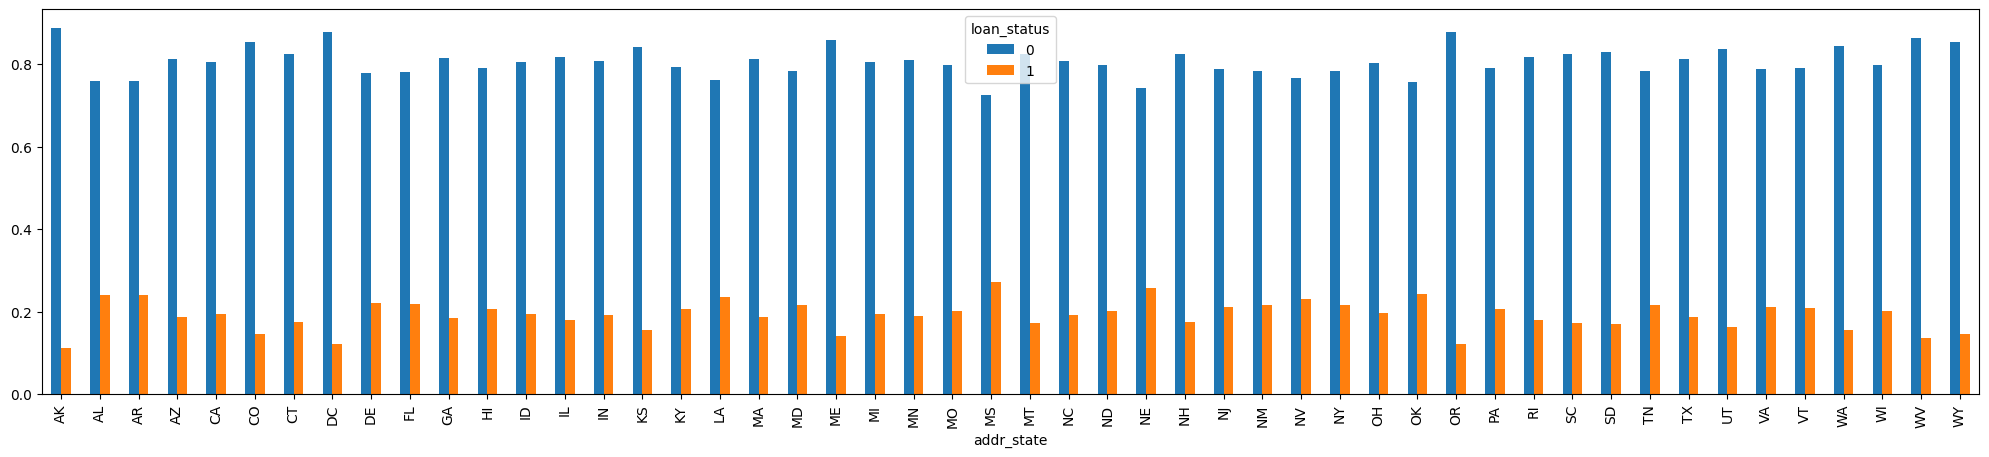

In [77]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(25,5))

plt.show()

It doesn't look like 'loan_status' depends too much on the state to which the borrower belongs. In general, no one state is better than the other. So we'll drop the 'addr_state' column.

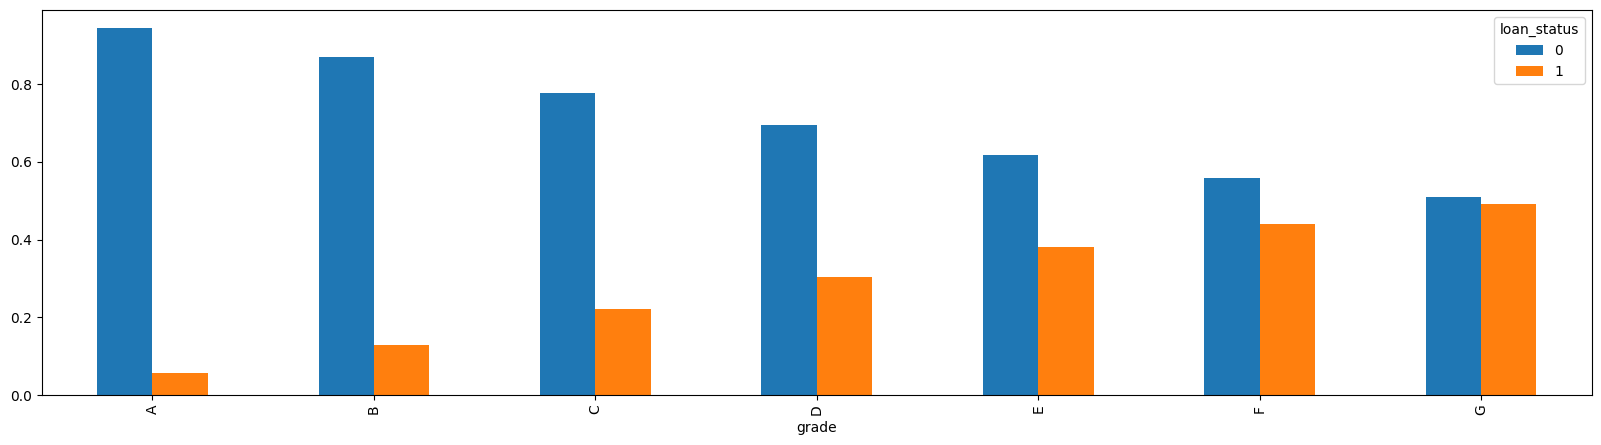

In [78]:
df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

plt.show()

There seems to be a strong relationship between 'grade' and 'loan_status'. So we will keep this column.

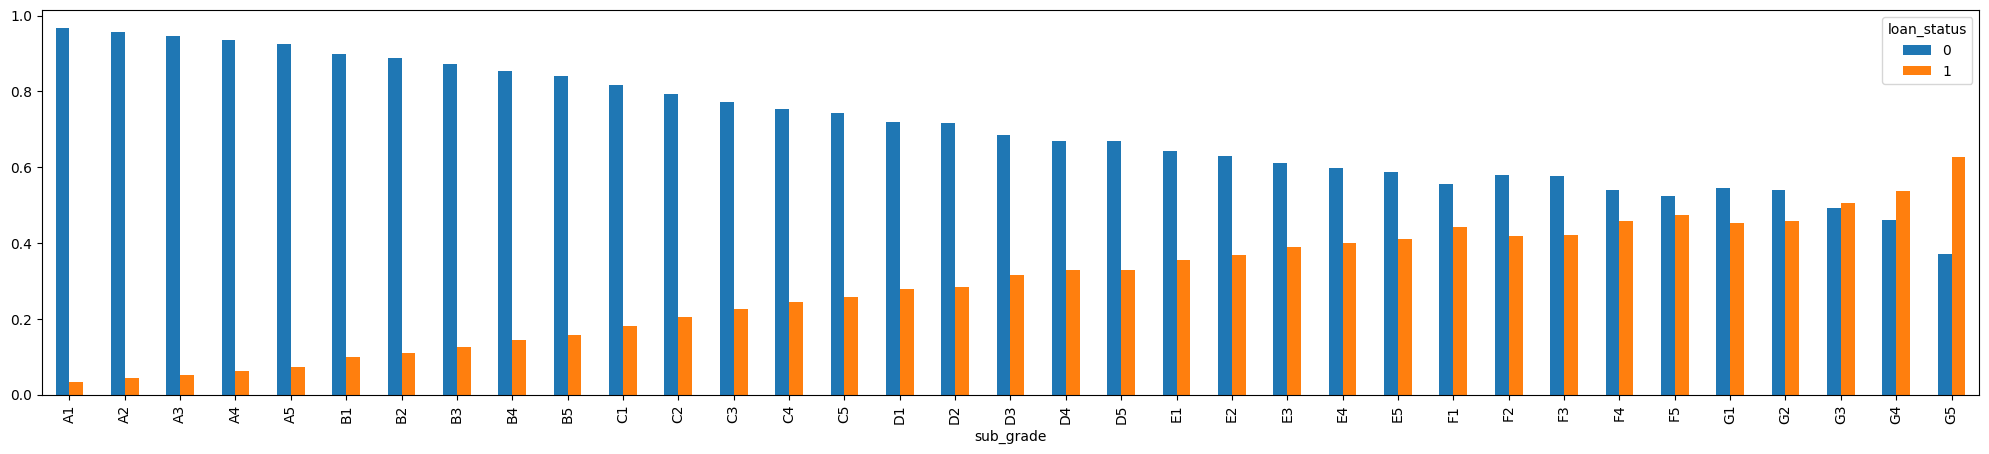

In [79]:
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(25,5))

plt.show()

There seems to be a strong relationship between 'sub_grade' and 'loan_status'. So we will keep this column.

In [80]:
df[['grade', 'sub_grade']]

,grade,sub_grade
0,E,E1
1,B,B1
2,B,B5
3,B,B2
4,F,F5
...,...,...
70370,G,G3
70371,C,C1
70372,B,B4
70373,D,D5


It looks like the 'sub_grade' column is a sub-division of the 'grade' and offers higher granulity. So we will choose any one of these columns.

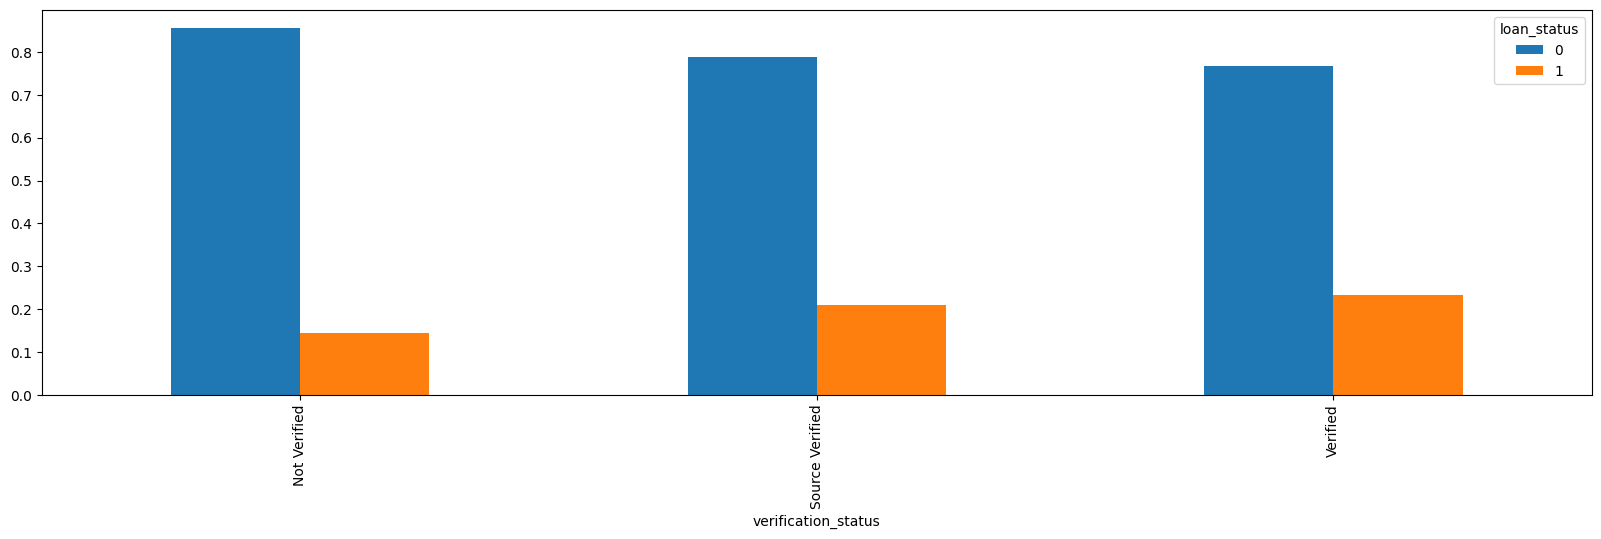

In [81]:
df.groupby('verification_status')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

plt.show()

It doesn't seem like the 'loan_status' is dependent on the 'verification_status'. So we'll drop this column.

### Check the number of class occurences

In [82]:
df['loan_status'].value_counts()

loan_status
0    56527
1    13848
Name: count, dtype: int64

The occurence of class `Defaulted` is really small, which means our dataset is unbalanced.

We will try the undersampling technique later and compare it with the technique that we will do now which doesn't use any balancing techniques.

### Select the columns according to the above analysis

In [83]:
final_cols = df.columns.to_list()

for col in ['emp_title', 'title', 'fico_range_high', 'earliest_cr_line', 'addr_state', 'sub_grade', 'verification_status']:
    final_cols.remove(col)

final_cols

['annual_inc',
 'emp_length',
 'fico_range_low',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'int_rate',
 'loan_amnt',
 'num_actv_bc_tl',
 'mort_acc',
 'tot_cur_bal',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'term',
 'total_acc',
 'loan_status']

In [84]:
new_df = df[final_cols].reset_index(drop=True)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70375 entries, 0 to 70374
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            70375 non-null  float64
 1   emp_length            70375 non-null  int64  
 2   fico_range_low        70375 non-null  int64  
 3   grade                 70375 non-null  object 
 4   home_ownership        70375 non-null  int64  
 5   application_type      70375 non-null  object 
 6   initial_list_status   70375 non-null  object 
 7   int_rate              70375 non-null  float64
 8   loan_amnt             70375 non-null  int64  
 9   num_actv_bc_tl        70375 non-null  float64
 10  mort_acc              70375 non-null  float64
 11  tot_cur_bal           70375 non-null  float64
 12  open_acc              70375 non-null  int64  
 13  pub_rec               70375 non-null  int64  
 14  pub_rec_bankruptcies  70375 non-null  float64
 15  purpose            

### One-hot encode the categorical columns

In [85]:
ready_df = pd.get_dummies(new_df, drop_first=True, dtype=int)
ready_df

,annual_inc,emp_length,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,grade_C,grade_D,grade_E,grade_F,grade_G,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
0,85000.0,10,740,1,18.99,18075,1.0,1.0,319479.0,7,...,0,0,1,0,0,0,1,0,1,0
1,40000.0,10,720,2,10.16,8800,4.0,0.0,19944.0,5,...,0,0,0,0,0,0,1,0,1,0
2,60000.0,10,675,1,11.47,18000,4.0,2.0,23199.0,7,...,0,0,0,0,0,0,1,0,1,0
3,100742.0,10,660,1,9.16,20000,4.0,1.0,72651.0,12,...,0,0,0,0,0,0,1,0,1,0
4,80000.0,10,665,2,23.83,35000,14.0,7.0,64631.0,23,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70370,81000.0,10,660,1,25.89,25850,5.0,4.0,220521.0,12,...,0,0,0,0,1,0,1,0,1,0
70371,45000.0,10,680,1,12.29,6975,2.0,2.0,245781.0,7,...,1,0,0,0,0,0,1,0,1,0
70372,90000.0,0,720,3,10.99,7000,1.0,3.0,382274.0,9,...,0,0,0,0,0,0,1,0,1,0
70373,94000.0,3,665,1,19.47,18000,3.0,3.0,201841.0,16,...,0,1,0,0,0,0,1,1,0,0


### Train-test split the data

In [86]:
from sklearn.model_selection import train_test_split

X = ready_df.drop(columns=['loan_status'])
y = ready_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 111)

### Feature Transformations

#### Standard-Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_sc.head()

,annual_inc,emp_length,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,grade_C,grade_D,grade_E,grade_F,grade_G,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
51218,0.113515,0.808414,-0.647884,-0.902759,-0.265056,0.608559,0.159045,2.154932,0.958875,-0.504211,...,-0.635707,-0.416891,-0.274045,-0.154338,-0.084136,-0.133485,-1.264374,-0.531589,0.836583,-0.260661
32414,0.608159,1.079924,-0.326498,0.595905,0.360261,0.854431,0.159045,-0.833572,-0.813209,0.218598,...,1.573052,-0.416891,-0.274045,-0.154338,-0.084136,-0.133485,0.790905,-0.531589,0.836583,-0.260661
9592,-0.503463,-1.635176,-0.487191,-0.902759,0.426961,-0.031852,0.159045,0.162596,0.182675,-1.046318,...,1.573052,-0.416891,-0.274045,-0.154338,-0.084136,-0.133485,-1.264374,-0.531589,0.836583,-0.260661
25757,-0.822405,-1.635176,0.155581,-0.902759,-0.133740,-1.061084,-0.726641,0.162596,-0.225047,-1.046318,...,1.573052,-0.416891,-0.274045,-0.154338,-0.084136,-0.133485,-1.264374,-0.531589,0.836583,-0.260661
6702,1.324092,1.079924,-0.165805,2.094569,1.346177,0.722918,-0.283798,-0.833572,-0.240357,-0.142806,...,-0.635707,2.398709,-0.274045,-0.154338,-0.084136,-0.133485,0.790905,-0.531589,0.836583,-0.260661


### Train Model

Build an xgboost classifier model with default parameters.

In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_sc, y_train)

y_hat = xgb.predict(X_test_sc)

Let's evaluate our model.

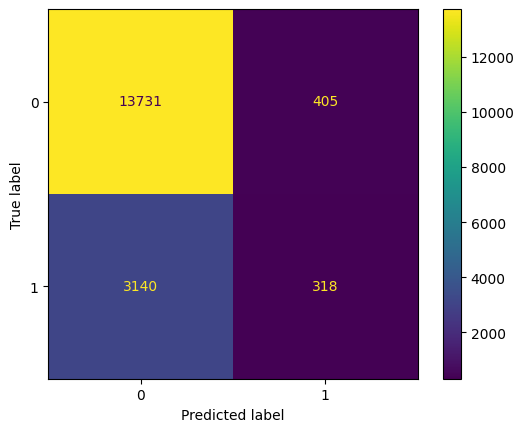

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score, f1_score

cm = confusion_matrix(y_test, y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [90]:
print(f'Test Accuracy: {xgb.score(X_test_sc, y_test)}\
      \nTest Precision: {precision_score(y_test, y_hat)}\
      \nTest Recall: {recall_score(y_test, y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(y_test, y_hat)}\
      \nTest f1 Score: {f1_score(y_test, y_hat)}')

Test Accuracy: 0.7985108559736274      
Test Precision: 0.43983402489626555      
Test Recall: 0.09196067090803933      
Test ROC AUC Score: 0.5316552081195546      
Test f1 Score: 0.15211671848839992


These scores are really bad. Next let's try undersampling our data.

### Undersampling

In [91]:
ready_df['loan_status'].value_counts()

loan_status
0    56527
1    13848
Name: count, dtype: int64

We will take a sample size equal to occurence of class `1` from the `0` class. And then concatenate it with the entirety of the `1` class.

In [92]:
sample0 = ready_df[ready_df['loan_status'] == 0].sample(ready_df['loan_status'].value_counts()[1])

under_df = pd.concat([sample0, ready_df[ready_df['loan_status'] == 1]]).reset_index(drop=True)

under_df['loan_status'].value_counts()

loan_status
0    13848
1    13848
Name: count, dtype: int64

The rest is similar.

Test Accuracy: 0.6415162454873646      
Test Precision: 0.6342398884239888      
Test Recall: 0.6600145137880987      
Test ROC AUC Score: 0.6416092683883021      
Test f1 Score: 0.6468705547652916


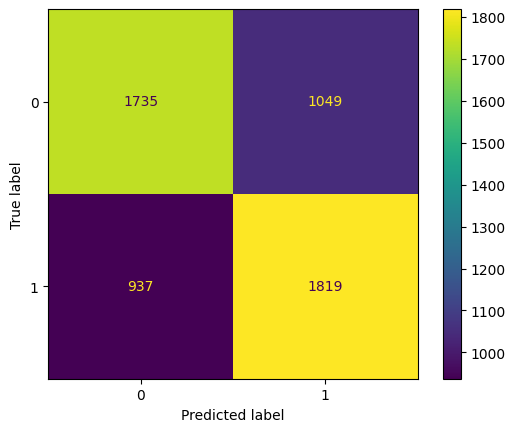

In [93]:
under_X = under_df.drop(columns=['loan_status'])
under_y = under_df['loan_status']

under_X_train, under_X_test, under_y_train, under_y_test = train_test_split(under_X, under_y, test_size = 0.2, random_state = 111)


under_scaler = StandardScaler()

under_X_train_sc = pd.DataFrame(under_scaler.fit_transform(under_X_train), columns=under_X_train.columns, index=under_X_train.index)
under_X_test_sc = pd.DataFrame(under_scaler.transform(under_X_test), columns=under_X_test.columns, index=under_X_test.index)


under_xgb = XGBClassifier()

under_xgb.fit(under_X_train_sc, under_y_train)

under_y_hat = under_xgb.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {under_xgb.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

These scores are so much better than those we got for the unbalanced data. Improvements can still be made,

Train Accuracy: 0.8304296804477342      
Train Precision: 0.822530999912057      
Train Recall: 0.8432203389830508      
Train ROC AUC Score: 0.8304134955942007      
Train f1 Score: 0.8327471842585585


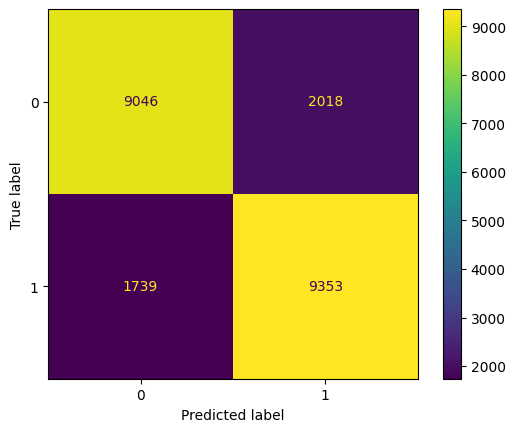

In [94]:
# Train data performance

under_y_hat = under_xgb.predict(under_X_train_sc)

cm = confusion_matrix(under_y_train, under_y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Train Accuracy: {under_xgb.score(under_X_train_sc, under_y_train)}\
      \nTrain Precision: {precision_score(under_y_train, under_y_hat)}\
      \nTrain Recall: {recall_score(under_y_train, under_y_hat)}\
      \nTrain ROC AUC Score: {roc_auc_score(under_y_train, under_y_hat)}\
      \nTrain f1 Score: {f1_score(under_y_train, under_y_hat)}')

### Hyper-parameter tuning

#### Let's perform hyperparameter tuning on our xgboost model using GridSearchCV and use the best estimator from the search.

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.683 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.668 total time=   0.1s
[CV 3/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.669 total time=   0.0s
[CV 4/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.684 total time=   0.0s
[CV 5/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.677 total time=   0.0s
[CV 1/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.670 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.668 total time=   0.1s
[CV 3/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.669 total time=   0.1s
[CV 4/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.684 total time=   0.1s
[CV 5/5] END learning_rate=0.0001, max_depth=3, n_estima

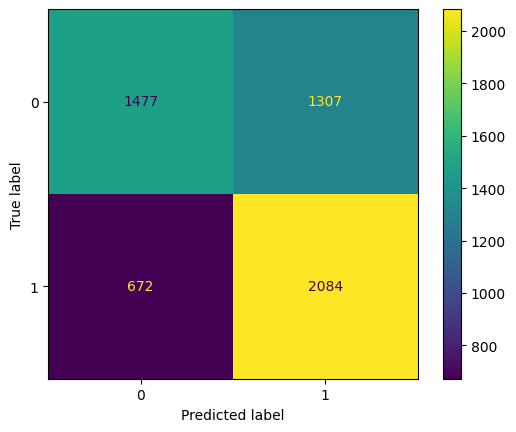

In [95]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

parameters = {'n_estimators':[100, 150, 200, 250, 300], 'learning_rate': [0.0001, 0.001, 0.01], 'max_depth': [3, 5, 10]}

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = "f1", verbose=4)
grid_search.fit(under_X_train_sc, under_y_train)

xg = grid_search.best_estimator_
xg.fit(under_X_train_sc, under_y_train)

under_y_hat = xg.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {xg.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

In [96]:
grid_search.best_params_

{'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100}

### Now let us build a random forest classifier model.

Test Accuracy: 0.648014440433213      
Test Precision: 0.6445480631276901      
Test Recall: 0.6520319303338171      
Test ROC AUC Score: 0.6480346433278281      
Test f1 Score: 0.6482683982683982


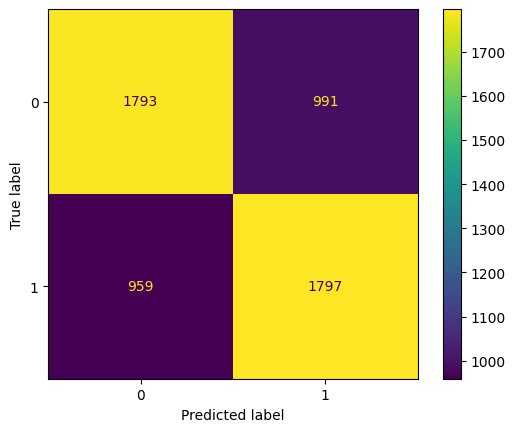

In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(under_X_train_sc, under_y_train)
under_y_hat = rfc.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {rfc.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

#### Let's perform hyperparameter tuning on our random forest model using GridSearchCV and use the best estimator from the search.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.670 total time=   0.7s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.655 total time=   0.6s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.659 total time=   0.7s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.659 total time=   0.6s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.645 total time=   0.6s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.673 total time=   0.9s
[CV 2/5] END .....max_depth=3, n_estimators=150;, score=0.649 total time=   1.0s
[CV 3/5] END .....max_depth=3, n_estimators=150;, score=0.662 total time=   1.1s
[CV 4/5] END .....max_depth=3, n_estimators=150;, score=0.658 total time=   1.0s
[CV 5/5] END .....max_depth=3, n_estimators=150;, score=0.646 total time=   1.0s
[CV 1/5] END .....max_depth=3, n_estimators=200;, score=0.670 total time=   1.3s
[CV 2/5] END .....max_depth=3, n_estimators=200;

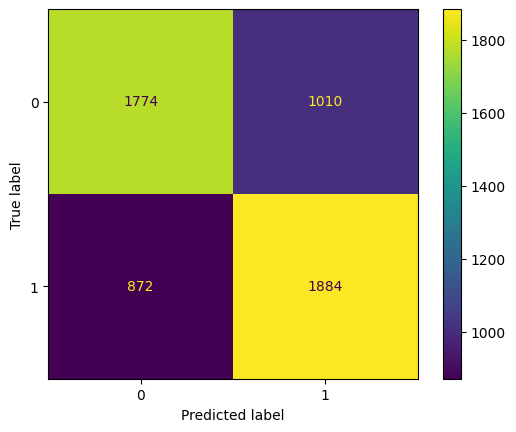

In [98]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

parameters = {'n_estimators':[100, 150, 200, 250, 300], 'max_depth': [3, 5, 10]}

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = "f1", verbose=4)
grid_search.fit(under_X_train_sc, under_y_train)

rf = grid_search.best_estimator_
rf.fit(under_X_train_sc, under_y_train)

under_y_hat = rf.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {rf.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

In [127]:
# The best estimator from the search is the following
rf

RandomForestClassifier(max_depth=5, n_estimators=150)

#### Test the best model on the full dataset

Train Accuracy: 0.5621314387211368      
Train Precision: 0.2771429321984921      
Train Recall: 0.761842865395725      
Train ROC AUC Score: 0.6375244719534394      
Train f1 Score: 0.4064335933737841


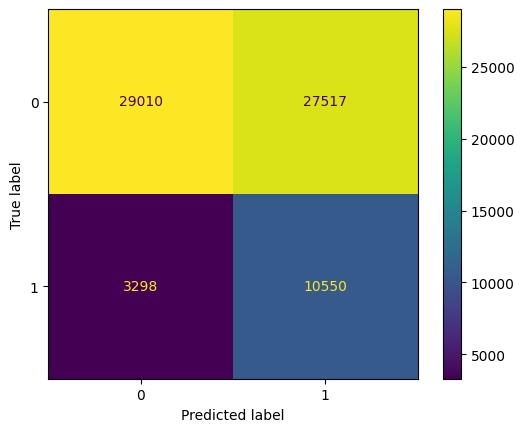

In [99]:
best = xg

X_sc = pd.DataFrame(under_scaler.transform(X), columns=X.columns, index=X.index)

y_hat = best.predict(X_sc)

cm = confusion_matrix(y, y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Train Accuracy: {best.score(X_sc, y)}\
      \nTrain Precision: {precision_score(y, y_hat)}\
      \nTrain Recall: {recall_score(y, y_hat)}\
      \nTrain ROC AUC Score: {roc_auc_score(y, y_hat)}\
      \nTrain f1 Score: {f1_score(y, y_hat)}')

### Predicting on the given test_data for evaluation

In [101]:
test = pd.read_csv('test_loan_data.csv')

test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


#### Pre-process this the same way we did the training data

In [102]:
test['emp_length'] = test['emp_length'].map(emp_len_enc)

test['term'] = test['term'].map(term_enc)

test['home_ownership'] = test['home_ownership'].apply(lambda x: 'OTHERS' if x in ['ANY', 'NONE', 'OTHER'] else x)
test['home_ownership'] = test['home_ownership'].map(term_enc)

test['purpose'] = test['purpose'].apply(lambda x: x if x in ['debt_consolidation', 'credit_card', 'home_improvement'] else 'OTHERS')

final_cols = test.columns.to_list()
for col in ['emp_title', 'title', 'fico_range_high', 'earliest_cr_line', 'addr_state', 'sub_grade', 'verification_status']:
    final_cols.remove(col)

new_test = test[final_cols].reset_index(drop=True)

ready_test = pd.get_dummies(new_test, drop_first=True, dtype=int)

test_sc = pd.DataFrame(under_scaler.transform(ready_test), columns=ready_test.columns, index=ready_test.index)

test_pred = pd.DataFrame(best.predict(test_sc), columns=['loan_status'], index=test_sc.index)

target_reenc = {key:value for value, key in target_enc.items()}

test_pred.to_csv('test_results.csv')

### Future improvements
The following can be implemented in the future to get better results.
- Clustering to handle ouutliers effectively instead of dropping columns entirely.
- Grouping similar categorical values together, like in 'emp_title' or 'purpose', by using NLP.
- Principal component analysis to to reduxe the number of features.